### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2021 Semester 2

## Assignment 1

**Student Name:**    Abhay Tyagi

**Student ID:**     1088116

This iPython notebook is a template which you should use for your Assignment 1 submission. This file should be submitted at the **Assignment 1: Code** link on the LMS, along with any images needed to run your code.

In addition to this file, you should submit a writren report explaining your results at the **Assignment 1: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. Mapping between world and image coordinates
Note: Writing code for this question is optional. However, if you do not include code here you *must* show your computation steps in your written report.

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
'''Question 1 in assignment report'''

'Question 1 in assignment report'

### 2. Secret messages with bandpass filters

Cover Image


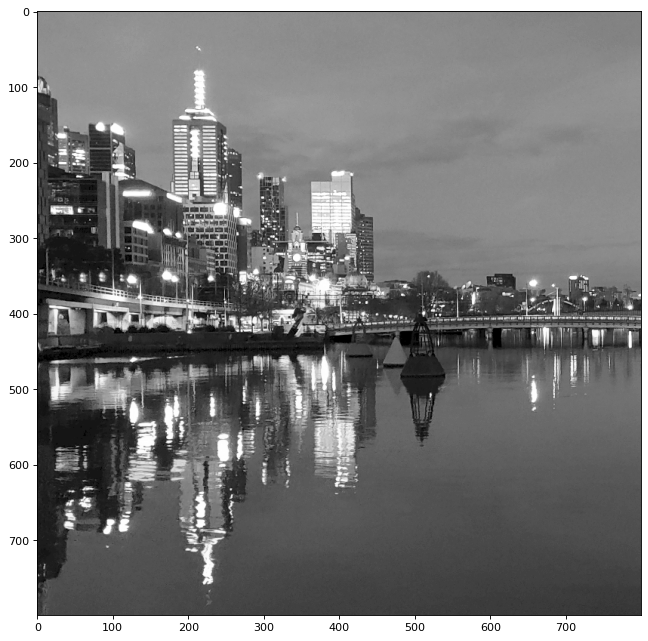

Message Image


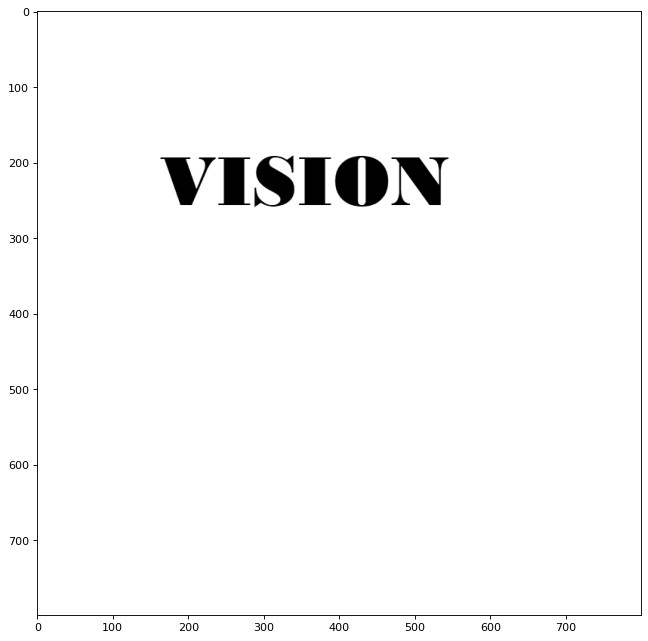

Final Result


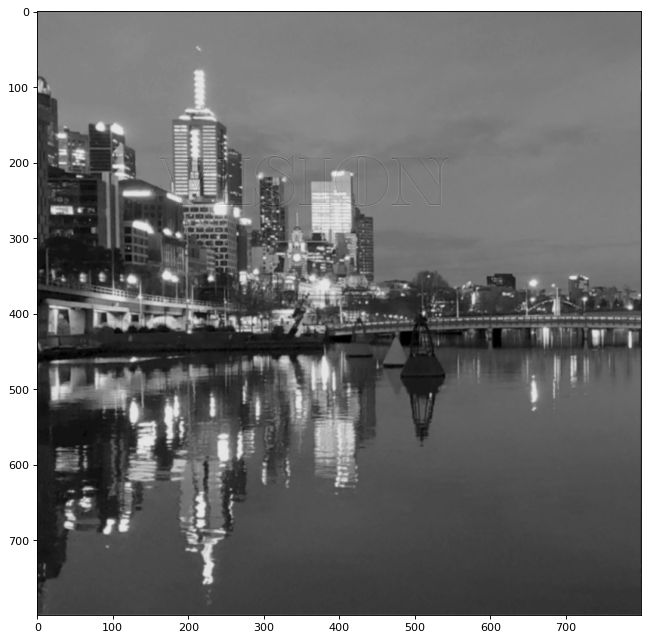

In [ ]:
def lowPass(f, radius):
    '''Applies a low pass filter and returns a filtered image
    Reference - COMP90086 Workshop 3'''
    m = f.shape[0]
    n = f.shape[1]
    mask = np.zeros((m, n))
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    for i in range(m):
        for j in range(n):
            dis = np.sqrt((i - x0)**2 + (j - y0)**2)
            mask[i][j] = np.exp((-1)*dis**2/2/(radius**2))
    result = np.multiply(f, mask) 
    return result


def highPass(f, radius):
    '''Applies a high pass filter and returns a filtered image
    Reference - https://www.fatalerrors.org/a/opencv-python-learning-frequency-domain-filtering.html'''
    m = f.shape[0]
    n = f.shape[1]
    mask = np.zeros((m, n))
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    for i in range(m):
        for j in range(n):
            dis = ((i - x0) ** 2 + (j - y0) ** 2)
            mask[i][j] = 1.0 - np.exp(-dis/(2*(radius**2.0)))
    result = np.multiply(f, mask)
    return result


rootpath = './'
# importing the message image
txt = cv2.imread(os.path.join(rootpath, 'txt.png'), cv2.IMREAD_GRAYSCALE)
# importing the cover image 
img = cv2.imread(os.path.join(rootpath, 'img.png'), cv2.IMREAD_GRAYSCALE)
 
# convert the images to the fourier domain 
f_txt = np.fft.fft2(txt)
f_txt = np.fft.fftshift(f_txt)
f_img = np.fft.fft2(img)
f_img = np.fft.fftshift(f_img)

# set the radius of the filters
radius_low = 150
radius_high = 300

# passing the cover image through a low pass filter
img_low_filtered = lowPass(f_img, radius_low)
# passing the message image through a high pass filter
txt_high_filtered = highPass(f_txt, radius_high)
# the final image is a sum of the two filtered images
final = img_low_filtered + txt_high_filtered

# invert the fourier transform to get the filtered image 
img_fin = np.real(np.fft.ifft2(np.fft.fftshift(final)))

# writing the image to a png file
cv2.imwrite('final_img.png', img_fin)

# plotting the initial images
print('Cover Image')
plt.figure(figsize=(10, 10), dpi = 80)
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

# plotting the initial images
print('Message Image')
plt.figure(figsize=(10, 10), dpi = 80)
plt.imshow(txt, cmap=plt.cm.gray)
plt.show()

# plotting the final image
print('Final Result')
plt.figure(figsize=(10, 10), dpi = 80)
plt.imshow(img_fin, cmap=plt.cm.gray)
plt.show()